This Notebook explores the statistics concerning named entities in the Harry Potter Dataset

# Imports & Settings

In [4]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import pandas as pd

Set Pandas Dataframe to display all rows and columns

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

To make box plot graphs interactive in the notebook


In [6]:
%matplotlib notebook

# Reusable Code Blocks
## How to make Boxplots from DataFrames

<AxesSubplot:title={'center':'Box Plots'}>

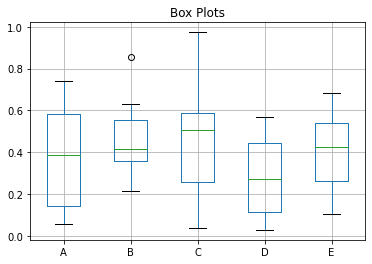

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box(grid='True', title="Box Plots")

## Loop for files in the directory with counter, progressbar and current file output

In [36]:
end = 10
# directory = ...

for i, filename in tqdm(enumerate(os.listdir(directory)), total=end):
    if i < end:
        if filename.endswith(".pickle"): 
            file_directory = os.path.join(directory, filename)
            tqdm.write(f"Current file: {file_directory}", end="")
            try:
                with open(file_directory, 'rb') as file:
                    nlp_article = pickle.load(file)
#                     ...
            except:
                pass

    else:
        break

Current file: nlp-article\harrypotter_00010-nlp-article.pickle


# Testing with one document
## Open one Harry Potter File

In [9]:
directory = 'harrypotter-mds\corpus\harrypotter_00012.txt'
with open(directory,'r', encoding='utf-8') as txt_file:
    text = txt_file.read()


## Run the spaCy Pipeline

In [10]:
doc = nlp(text)

## Print tokens
Check whether the number given by len(doc) really is the number of tokens.<br>
&#10004; len(doc) is the number of tokens in the document <br>
&#10004; token count with values aroung 30000 - 40000 are valid!
***

In [6]:
# i = 0
# for token in doc:
#     print(i, token)
#     i = i+1

# Statistics for entity and token counts in fandom corpus  
For each document save the following values in one DataFrame  
- `filename`
- `document length` (number of tokens)
- `number of entities`

In [4]:
end = 1472
document_statistics = pd.DataFrame()
directory = 'nlp-article'

for i, filename in tqdm(enumerate(os.listdir(directory)), total=end):
    if i < end:
        if filename.endswith(".pickle"): 
            file_directory = os.path.join(directory, filename)
            tqdm.write(f"Current file: {file_directory}", end="")
            try:
                with open(file_directory, 'rb') as file:
                    nlp_article = pickle.load(file) 
                    document_statistics.at[i, 'doc'] = filename #id of the document
                    document_statistics.at[i, 'doc_lenght'] = len(nlp_article)
                    document_statistics.at[i,'num_ents'] = len(nlp_article.ents)
            except:
                pass

    else:
        break

Current file: nlp-article\harrypotter_01470-nlp-article.pickle


## Calculate the entity-word-ratio  
&#10066; <font color=red>Calculate the entity-word-ratio average over <b>all documents</b> normalized over document length</font>

In [11]:
document_statistics['entity-word-ratio'] = document_statistics['num_ents'] / document_statistics['doc_lenght']

In [12]:
document_statistics.head()

,doc,doc_lenght,num_ents,entity-word-ratio
0,harrypotter_00000-nlp-article.pickle,29358.0,2392.0,0.081477
1,harrypotter_00001-nlp-article.pickle,63599.0,5252.0,0.082580
2,harrypotter_00002-nlp-article.pickle,50182.0,3949.0,0.078694
3,harrypotter_00004-nlp-article.pickle,62960.0,5152.0,0.081830
4,harrypotter_00005-nlp-article.pickle,44462.0,3143.0,0.070690


## Save and load DataFrame for later use

In [13]:
document_statistics.to_csv('Document Statistics.csv', sep='\t')

In [14]:
document_statistics = pd.read_csv('Document Statistics.csv', sep='\t', index_col=0)

In [15]:
document_statistics.head()

,doc,doc_lenght,num_ents,entity-word-ratio
0,harrypotter_00000-nlp-article.pickle,29358.0,2392.0,0.081477
1,harrypotter_00001-nlp-article.pickle,63599.0,5252.0,0.082580
2,harrypotter_00002-nlp-article.pickle,50182.0,3949.0,0.078694
3,harrypotter_00004-nlp-article.pickle,62960.0,5152.0,0.081830
4,harrypotter_00005-nlp-article.pickle,44462.0,3143.0,0.070690


## Box Plot number of tokens per document

<IPython.core.display.Javascript object>


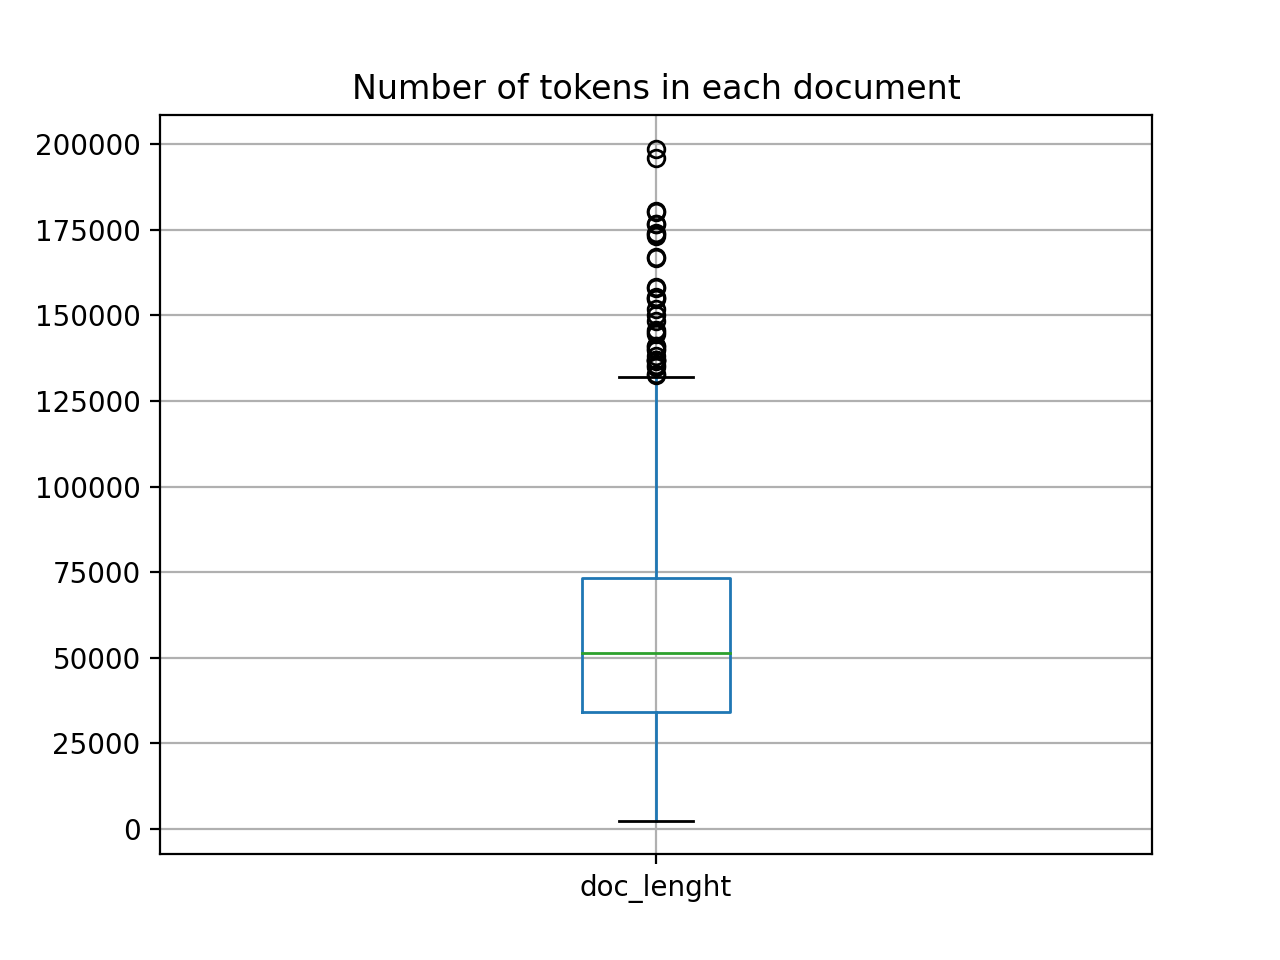

<AxesSubplot:title={'center':'Number of tokens in each document'}>

In [16]:
document_statistics[['doc_lenght']].plot.box(grid='True', title="Number of tokens in each document")

## Box Plot number of entities per document

<IPython.core.display.Javascript object>


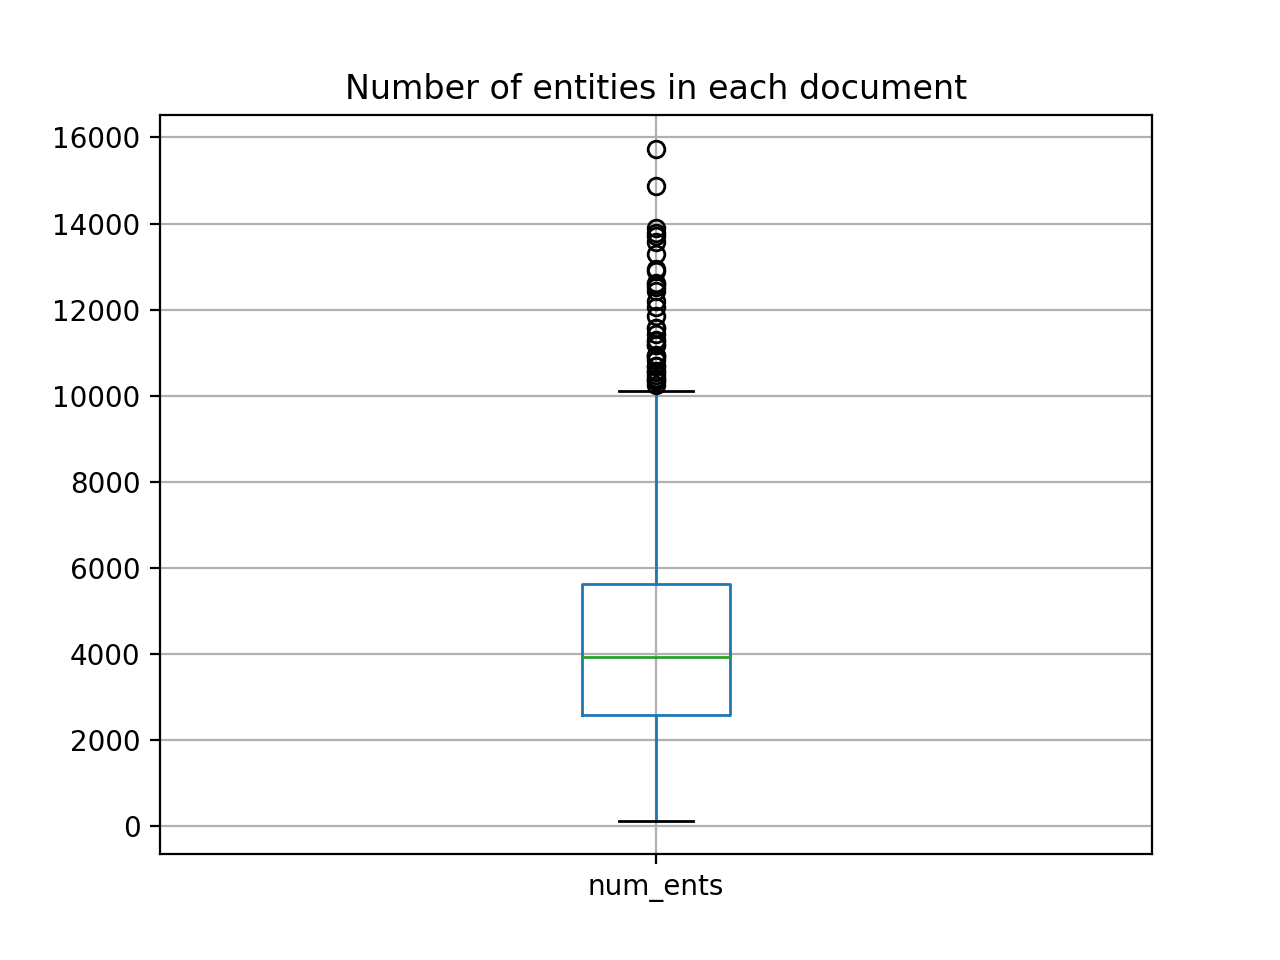

<AxesSubplot:title={'center':'Number of entities in each document'}>

In [17]:
document_statistics[['num_ents']].plot.box(grid='True', title="Number of entities in each document")

## Box Plot number of entity-word-ratio per document

<IPython.core.display.Javascript object>


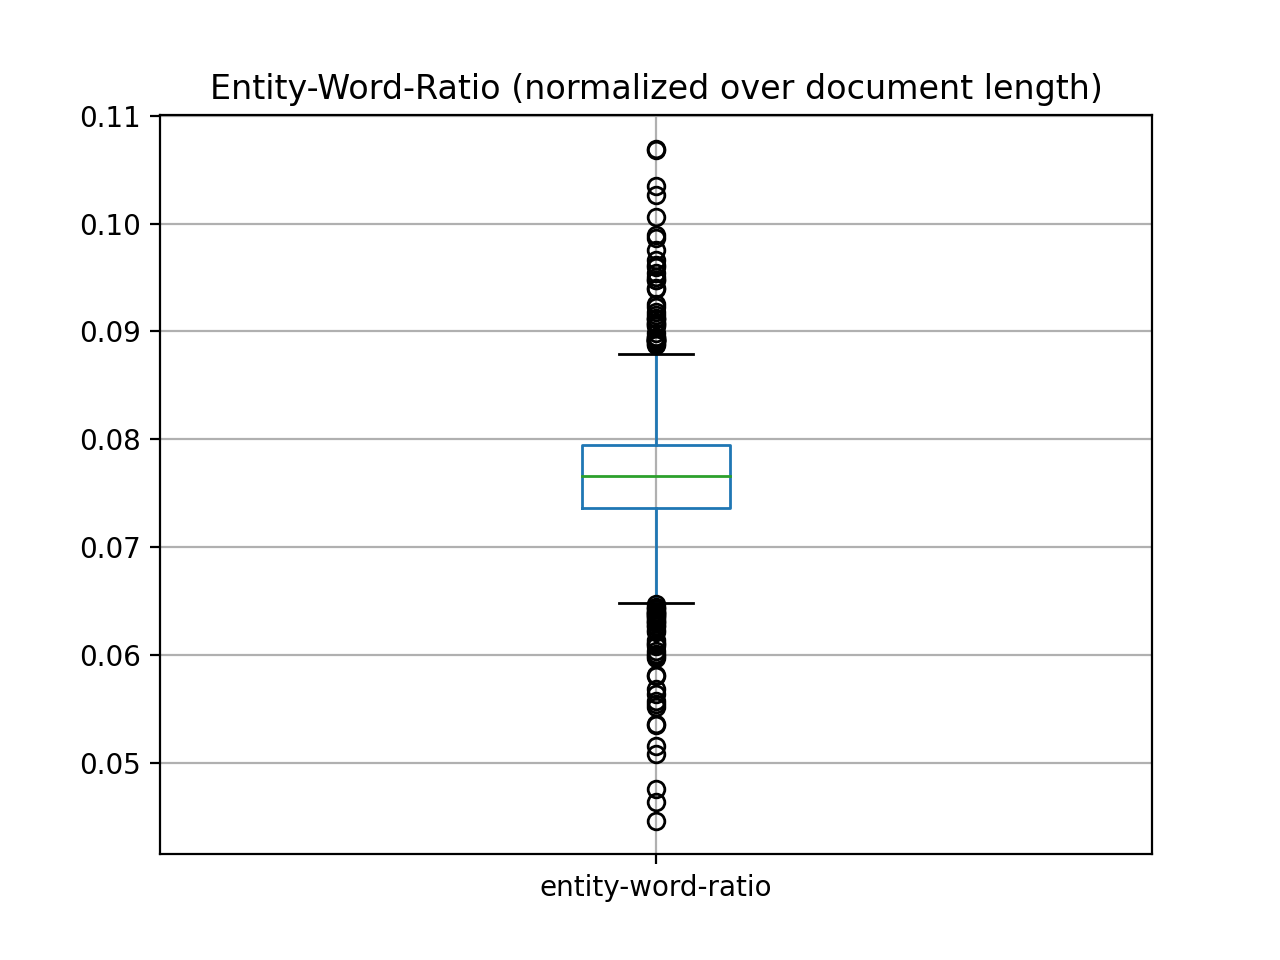

<AxesSubplot:title={'center':'Entity-Word-Ratio (normalized over document length)'}>

In [17]:
document_statistics[['entity-word-ratio']].plot.box(grid='True', title="Entity-Word-Ratio (normalized over document length)")

# Statistics for entities and their labels in the fandom corpus

## Save and load NER results as DataFrame

In [12]:
# Get List of all NER Labels for one Document
directory = 'nlp-article'

with open('nlp-article\harrypotter_00000-nlp-article.pickle', 'rb') as file:
    #     Call load method to deserialze
    article = pickle.load(file)
    print("Number of entities", len(article.ents))
    labels = [x.label_ for x in article.ents]
#     print("Labels", labels)
#     df['labels'] = labels
    print("num labels", Counter(labels))

    items = [x.text for x in article.ents]
#     df['entities'] = items
    print('Most Common', Counter(items).most_common(3))
    ner_labels = set(labels)
    print(ner_labels)
    print(len(ner_labels))

    item_label = [(x.text, x.label_) for x in article.ents]
#     print(item_label)
    print('Most Common', Counter(item_label).most_common(10))

Number of entities 2392
num labels Counter({'PERSON': 993, 'ORG': 533, 'DATE': 210, 'CARDINAL': 150, 'GPE': 129, 'ORDINAL': 86, 'PRODUCT': 79, 'FAC': 78, 'WORK_OF_ART': 38, 'LOC': 32, 'NORP': 29, 'EVENT': 22, 'TIME': 8, 'LAW': 3, 'QUANTITY': 2})
Most Common [('Harry', 231), ('Ron', 134), ('Voldemort', 63)]
{'ORG', 'QUANTITY', 'PERSON', 'NORP', 'EVENT', 'LOC', 'WORK_OF_ART', 'DATE', 'TIME', 'ORDINAL', 'GPE', 'CARDINAL', 'PRODUCT', 'FAC', 'LAW'}
15
Most Common [(('Harry', 'PERSON'), 231), (('Ron', 'PERSON'), 134), (('Albus', 'GPE'), 55), (('two', 'CARDINAL'), 41), (('Cedric', 'PERSON'), 39), (('first', 'ORDINAL'), 35), (('Ginny', 'PERSON'), 34), (('one', 'CARDINAL'), 31), (('Harry Potter', 'PERSON'), 30), (('Hufflepuff', 'ORG'), 30)]


In [7]:
# loop to save NER results over all documents in the fandom corpus as dataframe
end = 1472
directory = 'nlp-article'
entity_label_count_list = []

for i, filename in tqdm(enumerate(os.listdir(directory)), total=end):
    if i < end:
        if filename.endswith(".pickle"):
            file_directory = os.path.join(directory, filename)
            tqdm.write(f"Current file: {file_directory}", end="")
            try:
                with open(file_directory, 'rb') as file:
                    article = pickle.load(file)
                    item_label = [(x.text, x.label_) for x in article.ents]
                    item_label_count = Counter(item_label)
#                     print(item_label_count)
                    df = pd.DataFrame.from_dict(
                        item_label_count, orient='index').reset_index()
                    df[['entity', 'label']] = pd.DataFrame(
                        df['index'].tolist(), index=df.index)
                    df = df.rename(columns={0: 'count'})
                    df = df[['entity', 'label', 'count']]
                    df['document'] = filename
                    entity_label_count_list.append(df)
            except:
                pass

    else:
        break
entity_label_count = pd.concat(entity_label_count_list, ignore_index=True)

Current file: nlp-article\harrypotter_00000-nlp-article.pickle


In [73]:
entity_label_count.to_csv('Entity Label Count.csv', sep='\t')1

In [9]:
entity_label_count = pd.read_csv('Entity Label Count.csv', sep='\t')
entity_label_count = entity_label_count.drop('Unnamed: 0', 1)
entity_label_count.head(10)

C:\Users\SAMARS~1\AppData\Local\Temp/ipykernel_17236/3627428182.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  entity_label_count = entity_label_count.drop('Unnamed: 0', 1)


,entity,label,count,document
0,Lubbock-Smith,PERSON,1,harrypotter_00000-nlp-article.pickle
1,Prefect,FAC,1,harrypotter_00000-nlp-article.pickle
2,Quidditch Captain,PERSON,1,harrypotter_00000-nlp-article.pickle
3,Quidditch,NORP,5,harrypotter_00000-nlp-article.pickle
4,Brankovitch III,PERSON,1,harrypotter_00000-nlp-article.pickle
5,Karoonda\n|80px\n,ORG,1,harrypotter_00000-nlp-article.pickle
6,|Bulgaria,CARDINAL,1,harrypotter_00000-nlp-article.pickle
7,Dimitrov\n|80px\n,ORG,1,harrypotter_00000-nlp-article.pickle
8,Hawksworth\n|80px\n,ORG,1,harrypotter_00000-nlp-article.pickle
9,von Glockenspieler\n|,PERSON,1,harrypotter_00000-nlp-article.pickle


## Count of label occurences in the whole corpus

In [6]:
document_label_count = entity_label_count[['label', 'count']].groupby(['label']).sum().reset_index()

In [7]:
document_label_count.to_csv('Document Label Count.csv', sep='\t', index=False)

In [8]:
document_label_count = pd.read_csv('Document Label Count.csv', sep='\t')

<AxesSubplot:title={'center':'Label count in fandom corpus'}, xlabel='label'>

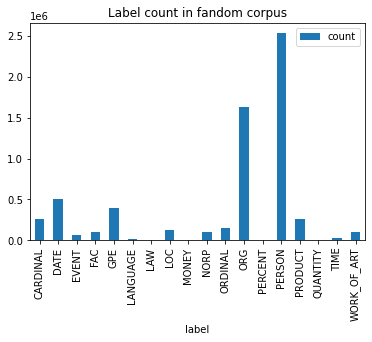

In [9]:
document_label_count.plot(x='label',y="count", kind="bar", title="Label count in fandom corpus")

In [43]:
document_label_count.sort_values(by='count', ascending=False)

,label,count
13,PERSON,2534377
11,ORG,1630965
1,DATE,500276
4,GPE,393459
14,PRODUCT,265740
0,CARDINAL,264710
10,ORDINAL,144870
7,LOC,125045
9,NORP,107652
17,WORK_OF_ART,104080


## Count of entity occurences in the whole corpus

In [13]:
document_entity_count = entity_label_count[['entity', 'count']].groupby(['entity']).sum().reset_index()

In [14]:
document_entity_count.to_csv('Document Entity Count.csv', sep='\t', index=False)

In [6]:
document_entity_count = pd.read_csv('Document Entity Count.csv', sep='\t')

In [7]:
document_entity_count.sort_values(by='count', ascending=False).head(20)

,entity,count
7125,Harry,570088
15081,Voldemort,417358
13054,Snape,184807
5373,Dumbledore,144775
7673,Hogwarts,119355
12309,Ron,116206
7149,Harry Potter,103594
16517,first,78464
4959,Death Eaters,63512
20298,two,61226


## Number of occurences of entity - label pairs per document

In [10]:
entity_label_count.head(100)[['entity', 'label', 'count']].groupby(['entity','label']).sum().reset_index().head(20)

,entity,label,count
0,"1 September, 1991",DATE,1
1,1 a.m.,TIME,1
2,1980,DATE,1
3,Albus,GPE,55
4,Angelina Johnson,PERSON,3
5,Apparition,PRODUCT,4
6,Appleby\n|-,ORG,1
7,Battista\n|-,ORG,1
8,Bishopper\n|-,ORG,1
9,Brankovitch III,PERSON,1


## Assign the most frequent label to entity

In [26]:
label_for_entity_count = entity_label_count[['entity', 'label', 'count']].groupby(['entity','label']).sum().reset_index()

In [27]:
label_for_entity_count.to_csv('Label for Entity Count.csv', sep='\t', index=False)

In [11]:
label_for_entity_count = pd.read_csv('Label for Entity Count.csv', sep='\t')

In [13]:
label_for_entity_count.head(20)

,entity,label,count
0,"""Book Herding",WORK_OF_ART,1
1,"""Can You Dance Like a Hippogriff",WORK_OF_ART,1
2,"""Dark Arts",WORK_OF_ART,25
3,"""Dark Arts""",WORK_OF_ART,62
4,"""Hand of Glory",WORK_OF_ART,2
5,"""Happy Birthday Harry",WORK_OF_ART,19
6,"""Mad-Eye",PERSON,414
7,"""Mad-Eye",WORK_OF_ART,191
8,"""Mad-Eye Moody""",WORK_OF_ART,166
9,"""Mad-Eye"" Moody.\n",WORK_OF_ART,55


In [18]:
idx = label_for_entity_count.groupby(['entity'])['count'].transform(max) == label_for_entity_count['count']
label_for_entity_max = label_for_entity_count[idx]

In [19]:
label_for_entity_max.sort_values(by='entity', ascending=True).head(20)

,entity,label,count
0,"""Book Herding",WORK_OF_ART,1
1,"""Can You Dance Like a Hippogriff",WORK_OF_ART,1
2,"""Dark Arts",WORK_OF_ART,25
3,"""Dark Arts""",WORK_OF_ART,62
4,"""Hand of Glory",WORK_OF_ART,2
5,"""Happy Birthday Harry",WORK_OF_ART,19
6,"""Mad-Eye",PERSON,414
8,"""Mad-Eye Moody""",WORK_OF_ART,166
9,"""Mad-Eye"" Moody.\n",WORK_OF_ART,55
10,"""Moaning Myrtle",WORK_OF_ART,22


In [41]:
label_for_entity_max.to_csv('Entity max label.csv', sep='\t', index=False)

In [16]:
label_for_entity_max = pd.read_csv('Entity max label.csv', sep='\t')

In [17]:
label_for_entity_max.head(20)

,entity,label,count
0,"""Book Herding",WORK_OF_ART,1
1,"""Can You Dance Like a Hippogriff",WORK_OF_ART,1
2,"""Dark Arts",WORK_OF_ART,25
3,"""Dark Arts""",WORK_OF_ART,62
4,"""Hand of Glory",WORK_OF_ART,2
5,"""Happy Birthday Harry",WORK_OF_ART,19
6,"""Mad-Eye",PERSON,414
7,"""Mad-Eye Moody""",WORK_OF_ART,166
8,"""Mad-Eye"" Moody.\n",WORK_OF_ART,55
9,"""Moaning Myrtle",WORK_OF_ART,22
